In [1]:
# ドライブ読み込み
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [2]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=5a221c3214bf8b5d57f7ae5df10776d09be85aafec03044d2545b9a04e261d4b
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import sympy
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from PIL import Image

データの前処理は非常に重要

現実のデータはそのまま使うといい結果が得られない

前処理を行うことで、データは整理・最適化・変換され

それによってモデルの学習効率と予測性能を高められる

# 現実のデータは汚い

※現実世界のデータを処理したいとき、データをそのまま扱うことはまずできない、と考えておくべき(２０２４, 2024, R6, 令和6, 令和６)



# データの前処理の必要性

## 1. データの品質向上

実世界のデータは不完全で、欠損値、異常値、ノイズを含むことが多い。

不完全なデータを使って機械学習をしても良い結果が得られない。

## 2. 特徴量のスケーリング

異なる特徴量が異なるスケールを持っている場合、標準化や正規化することで、モデルの精度が上がることが多い。

## 3. 次元削減

パラメータの次元が大きい場合、計算コストに時間がかかり、余計なパラメータが過学習を引き起こしやすくなる。

次元削減という操作を行うとパラメータを厳選することで計算量が減り、過学習が起こりにくくできる。

## 4. 特徴量エンジニアリング

データから有意義な特徴量を抽出または作成することで、モデルの性能を向上させることができる。

## 5. データの不均衡の対処

分類問題などにおいて、あるクラスのデータが他のクラスよりも、はるかに多いなどデータのバランスが悪い場合、良い結果を得られない。

# 現実世界でよく見るデータの問題点

１．データが構造化されていない。

２．欠損値がある。

３．外れ値がある。

４．数値化されていない変数がある。

５．スケーリングが必要。

６．特徴量の変換が必要。

７．変数の集約が必要。

８．その他のデータの不整合がある。


## 1. データが構造化されていないとき

文字列として置換などによって表記を統一し、できるだけ数値にする。

最後に文字列から数値へ型変換を行う。

(文字を置き換えるだけだから簡単)

## 1の対応策

In [4]:

df = pd.read_csv("01_sample.csv")
df = df[['day','address']]
print(df)
print()

df_2 = df.replace({
    '日':'',
    '年':'/',
    '月':'/',
    '０':'0',
    '１':'1',
    '２':'2',
    '３':'3',
    '７':'7',
    '阿佐谷':'阿佐ヶ谷'},regex=True)
print(df_2)

          day address
0    2023/1/1     阿佐谷
1   2023/1/11    阿佐ヶ谷
2   2023/1/13      荻窪
3   2023/1/14      荻窪
4   2023/1/15      中野
5  2023年1月16日      中野
6   2023/1/22      中野
7   2023/1/23    阿佐ヶ谷
8   2023/1/26     阿佐谷
9   ２０２３/１/２７     阿佐谷

         day address
0   2023/1/1    阿佐ヶ谷
1  2023/1/11    阿佐ヶ谷
2  2023/1/13      荻窪
3  2023/1/14      荻窪
4  2023/1/15      中野
5  2023/1/16      中野
6  2023/1/22      中野
7  2023/1/23    阿佐ヶ谷
8  2023/1/26    阿佐ヶ谷
9  2023/1/27    阿佐ヶ谷


## 2. 欠損値があるとき

欠損値ができてしまう原因・種類3つ

### ・完全に無作為な欠損（MCAR,  Missing Completely At Random）

完全にランダムに欠損値が発生している状態。

欠損値が生まれる確率がデータに全く依存せず、完全にランダムに欠損値が発生すること。


欠損値の発生が、「その変数自体の値」や「他の変数の値」に影響されていない。


リストワイズ法（後述）を用いても、他の変数の統計量に影響を与えにくい。



（例）性別と体重のデータを収集するとき、サイコロを振って、もし１が出たら体重を入力しないとしたとき、この場合の欠損値は MCAR になる。
人間の入力忘れなど


### ・条件付きで無作為な欠損（MAR,  Missing At Random）

欠損値が生まれる確率が、観測されたデータで条件付けるとランダムになること。

欠損値の発生が「他の変数の値」に影響されていて、「その変数自体の値」には影響されていない。

（例）「試験１の点数が一定以上だと、試験２を受けられる」という場合の試験２
の点数の欠損。この場合、試験２の点数が欠損かどうかは試験１の点数のみによって決まる。リストワイズ法（後述）を用いると、他の変数の統計量に影響を与えてしまう。

（例）男性よりも女性の方が体重を入力したくないとき、変数「性別」によって、
変数「体重」の欠損する確率が変わる。ただ、女性だけに絞ると欠損はランダ
ムと考えられるので MAR になる。




### ・無作為ではない欠損（MNAR,  Missing Not At Random）

欠損値が生まれる確率が、欠損データ自体に依存していること。

欠損値の発生が、「その変数自体の値」に影響されている。他の変数を統制しても、ある変数の欠損が「その変数自体の値」と関係が残っている。

（例）体重が重い人ほど体重を入力したくないと考えると、体重によって欠損確率
が変わる。

（例）点数が低い生徒の点数が欠損している。つまり、欠損の手がかりが欠損した
データそのものにある場合、MNAR に該当する。また、欠損値と観測したデー
タの両方に依存する欠損も、MNAR に該当する。




## 2の対応策

### 欠損値を削除する

#### ・リストワイズ法 (list-wise deletion)

1変数でも欠損している場合、データごと削除する。

つまり、欠損値を含む行を削除する手法。

MCAR以外の場合に適応すると、他の変数の統計量や分布を歪める可能性がある。


#### ・ペアワイズ法 (pair-wisedeletion)

個々の分析（２変数間の相関）などを行う際に、必要な変数内だけで欠損しているサンプルデータのみを削除する手法。

リストワイズ法のように極端にデータ数が減少する事はなく、削除されるデータ数が必要最低限で済む。

しかし、機械学習の分野においては多変量から予測を行うことがほとんどであることや、変数によって欠損の実装を行わなければならないことから、リストワイズ法の方が比較的よく使われます。


### 欠損値を補完する

#### ・単一代入法（Single Imputation Method）

単一代入法は欠損値１つに対して１つの値で補完する手法です。

実際には単一代入法にも複数の種類が存在する。

最も初歩的なものは欠損値を同じ変数のその他の数値の平均値で補完する手法です。

他にも多変数から回帰モデルを用いて欠損値を予測する回帰代入法なども存在します。

単一代入法はデータ数を削減することがありません。

実装も比較的簡単なため、データセットに合わせながら多変数のグループごとの平均を代入するなどの工夫を行う場合が多いです。

#### ・線形補完

#### ・多重代入法（Multiple Imputation Method）

欠損箇所に予測値を入れたデータセットをいくつか作り、最後に合体させる。

#### ・完全情報最尤推定法 (Full Information Maximum Likelihood method, FIML)


In [5]:
# 欠損値の確認 リストワイズ dropna()で欠損値を含む行を、まるごと削除する

df2 = pd.read_csv("02_sample.csv")
df2 = df2[['A','B','C','D']]

print("元のデータフレームは")
print(df2)
print()
print("欠損値 NaN の個数は")
print(df2.isnull().sum())
print()
print("欠損値 NaN を含む行を削除する(1)")
print(df2.dropna())
print()
print("欠損値 NaN を含む行を削除する(2)")
print(df2.dropna(axis=0))
print()
print("欠損値 NaN を含む列を削除する")
print(df2.dropna(axis=1))

元のデータフレームは
     A     B             C     D
0  0.2  0.10  1.000000e-07  1.54
1  0.4   NaN -1.000000e+00  2.90
2  0.6  0.90           NaN  2.52
3  0.8   NaN -2.900000e+00   NaN
4  1.0  2.49 -4.100000e+00  3.50

欠損値 NaN の個数は
A    0
B    2
C    1
D    1
dtype: int64

欠損値 NaN を含む行を削除する(1)
     A     B             C     D
0  0.2  0.10  1.000000e-07  1.54
4  1.0  2.49 -4.100000e+00  3.50

欠損値 NaN を含む行を削除する(2)
     A     B             C     D
0  0.2  0.10  1.000000e-07  1.54
4  1.0  2.49 -4.100000e+00  3.50

欠損値 NaN を含む列を削除する
     A
0  0.2
1  0.4
2  0.6
3  0.8
4  1.0


#### 単一代入法（Single Imputation Method）

全ての値を特定の値で埋める。この例では 100 で埋めてみる。


In [6]:
print("欠損値 NaN を指定した値で補完する")  # たとえば 100 で補完する。
print(df2.fillna(100))

欠損値 NaN を指定した値で補完する
     A       B             C       D
0  0.2    0.10  1.000000e-07    1.54
1  0.4  100.00 -1.000000e+00    2.90
2  0.6    0.90  1.000000e+02    2.52
3  0.8  100.00 -2.900000e+00  100.00
4  1.0    2.49 -4.100000e+00    3.50


#### 線形補完する

値が線形になるように補完

In [7]:
df2 = pd.read_csv("02_sample.csv")
print(df2)
print()

df2_4 = df2.interpolate(method='linear', limit_direction='forward', limit_area='inside')
print("線形補完すると")
print(df2_4)

     A     B             C     D
0  0.2  0.10  1.000000e-07  1.54
1  0.4   NaN -1.000000e+00  2.90
2  0.6  0.90           NaN  2.52
3  0.8   NaN -2.900000e+00   NaN
4  1.0  2.49 -4.100000e+00  3.50

線形補完すると
     A      B             C     D
0  0.2  0.100  1.000000e-07  1.54
1  0.4  0.500 -1.000000e+00  2.90
2  0.6  0.900 -1.950000e+00  2.52
3  0.8  1.695 -2.900000e+00  3.01
4  1.0  2.490 -4.100000e+00  3.50


## 3. 外れ値があるとき

外れ値とは、他のデータと著しく離れたデータのことを指し、外れ値が混在すると、「分析結果が正確でなくなる」「モデルの学習が遅くなる」といった問題が生じる。

よって、外れ値についても前処理の段階で検知し、除外する必要がある。


## 3の対応策

検知には、四分位範囲 IQR を用いた方法などがある。
また、外れ値が存在するかどうかは可視化するとわかりやすい。
可視化には seaborn の sns.catplot() を使う。箱ひげ図が描画され、外れ値は「♦︎」で表示してくれる。

なお、外れ値が重要な場合もある。


異常値と考えると、異常検出の技術に応用できる。

クレジットカードの不正利用の自動検出などに使われている。


## 4. 数値化されていない変数があるとき

データには大きく分けて　量的データ　と　カテゴリカル（質的）データ　の
２種類が存在します。

量的データは身長や時刻などの数値として意味があるも
のを指します。

一方、カテゴリカルデータは、性別、順位、色、形などの分類
や区別を行うためのデータです。

機械学習では全てのデータは、最終的に数値にならないと処理できません。

そこで、カテゴリカル（質的）データを、数値に変換（符号化, encode）する
ことを　**エンコーディング**　と言います。

今回は、エンコーディングの手法として、

**・ラベルエンコーディング**

**・ワンホットエンコーディング**

がある。

他に、

・Ordinalエンコーディング

・Effectコーディング

・カウント（Frequency）エンコーディング

など。


## 4の対応策

#### ラベルエンコーディング

ラベルの種類に応じて、数値を割り当てる手法



In [8]:
df4 = pd.read_csv("04_sample.csv")
print(df4)
df4_1 = df4['color'].replace({'yellow':0, 'red':1, 'green':2, 'blue':3})
print(df4_1)

    color
0  yellow
1     red
2     red
3   green
4    blue
5   green
6     red
7   green
0    0
1    1
2    1
3    2
4    3
5    2
6    1
7    2
Name: color, dtype: int64


#### ワンホットエンコーディング(one-hot vector 化)

カテゴリカルデータを、0 または 1 で表現した変数を　**ダミー変数**　と言います。

例えば、「性別」の列に「男性」と「女性」というカテゴリデータが存在したとします。

このデータは数値ではないので、実際にデータ分析を行うには少し扱いづらいです。

このとき「男性かどうか？」、「女性かどうか？」をそれぞれ 1 と 0 で表します。

このように数値として扱えないデータを 0 と 1 に数値化する際に用いられる変数がダミー変数です。

機械学習の分野では、ダミー変数(0, 1)を用いた前処理を　**ワンホットエンコーディング**　と呼びます。

ダミー変数は「グループ名称などのカテゴリデータを、0 または 1 で表現した変数」と言えます。

繰り返しますが、ダミー変数に使うのは、 0 と 1 だけです。

#### メリット

カテゴリ変数のそれぞれの要素に応じて重みづけができ、正確な予測ができる場合がある。

また、ワンホットエンコーディングは、ラベルエンコーディングと異なり、数値の大小関係を各変数に持たせないため、線形回帰やニューラルネットのアルゴリズムでも有効な場合がある。

#### デメリット

元の表に存在する値の数だけ、変換後に列が作られる事になります。

今回は４種類程度でしたが、値の数が膨大になればその分の列を作成しなければなりません。

つまりメモリの消費量が大きくなります。

大規模データセットに対してワンホットエンコーディングを行う場合は、そういった点も考慮する必要があります。


In [9]:
df4_2 = pd.get_dummies(df4)
print(df4_2)

   color_blue  color_green  color_red  color_yellow
0           0            0          0             1
1           0            0          1             0
2           0            0          1             0
3           0            1          0             0
4           1            0          0             0
5           0            1          0             0
6           0            0          1             0
7           0            1          0             0


## 5.スケーリング

0.01～0.8 の範囲の A というパラメータと 100～1000 の範囲の B というパラメータがあるとき、Bでの 0.5 の差はとても小さいが、A にとってはとても大きい。

そこで、どのパラメータにとっても、影響の度合が同じになるように（0～1 の範囲になるように）　**スケーリング**　という作業を行う。

**・正規化(min-max normalization)**

**・標準化(Standardization,  Z-score normalization)**


## 5の対応策

#### 正規化(min-max normalization)

正規化とは、各変量${xi}$からそのデータの最小値を引き、データの範囲で割ることを指します。

これにより、データの最小値は 0 、最大値は 1 に変換されます。

元のデータに単位があっても、正規化されたデータは、単位をもたなくなります。

（この「単位がなくなる」ことを物理学の用語では「無次元」と言います。機械学習の次元とは意味が違うので注意。）

$$ Xi = \frac{{xi - xmin}}{{xmax - xmin}} $$


In [10]:
from sklearn import preprocessing
X = np.array([0, 1, 2, 3, 4])
print(preprocessing.minmax_scale(X))

[0.   0.25 0.5  0.75 1.  ]


#### 標準化(Standardization,  Z-score normalization)

標準化とは、各変量${xi}$から平均値を引いて標準偏差で割ることを指します。

これにより、データの平均は 0 、分散は 1 、標準偏差も１に変換される。

この変換後のデータを　Zスコア　と言ったりします。

ちなみに、Zスコアを応用したのが「偏差値」(学力偏差値が有名)です。


$$ Zi = \frac{{xi - \bar{x}}}{{Sx}} $$

In [11]:
from sklearn.preprocessing import StandardScaler
X = np.array([0, 1, 2, 3, 4])

ss = StandardScaler()
print(ss.fit_transform(X.reshape(-1,1)))

[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


## 6. 特徴量の変換

特徴量を変換することで、処理しやすくなる。

以下は ${ y = 0.3＊10^x }$ の一部であ
る。
これを線形回帰で値を予測したい。

両辺の常用対数を考える

$$ \log(y) = x + \log(0.3) $$
$$ z = \log(y) $$
$$ z = x + \log(0.3) $$


つまり、z は所詮 x の１次関数である。

よって、z と x は単回帰できる。


           x             y
0   0.000000      0.300000
1   0.050505      0.336997
2   0.101010      0.378557
3   0.151515      0.425242
4   0.202020      0.477685
..       ...           ...
70  4.797980  18840.874326
71  4.848485  21164.406932
72  4.898990  23774.486951
73  4.949495  26706.452563
74  5.000000  30000.000000

[75 rows x 2 columns]


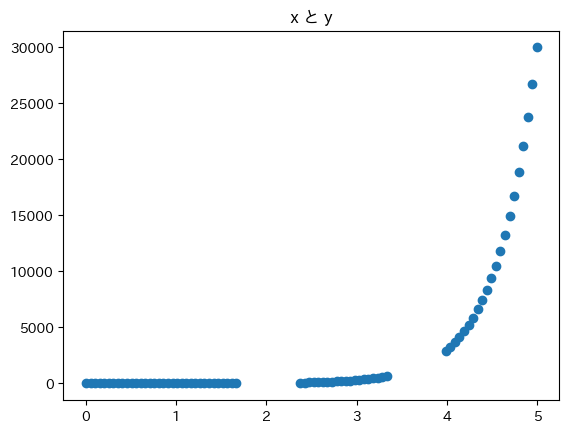

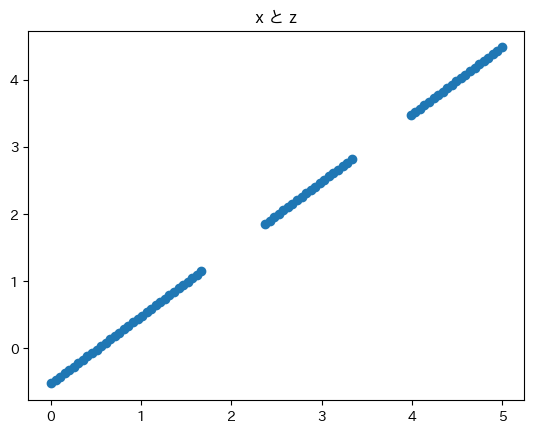

[1.]
-0.5228787452803363


In [12]:
df6 = pd.read_csv("sample6.csv")
print(df6)

x = df6["x"].to_numpy()
y = df6["y"].to_numpy()

plt.title(" x と y ")
plt.scatter(x, y)
plt.show()

z = np.log10(y)
#print(z)
plt.title(" x と z ")
plt.scatter(x, z)
plt.show()

model = LinearRegression()
model.fit(x.reshape(-1,1), z)
print(model.coef_)
print(model.intercept_)

## 7. 変数の集約

現実世界のデータには、変数同士の相関が高く、変数に冗長性があるものもあります。

これは、似たようなものを表している変数が、複数ある状態を指します。

この状態は避けるべきであり、何らかの形で集約する必要があります。

もし、これをしないと…

・多重共線性が起こってしまう。

・計算量が増えてしまう


## 7の対応策

・まず相関関係を sns.pairplot() など
で可視化し、どの変数が不要かを調べ
る。

・次元削減などで本質的な変数に減らす方法を施す。


<Figure size 2000x1500 with 0 Axes>

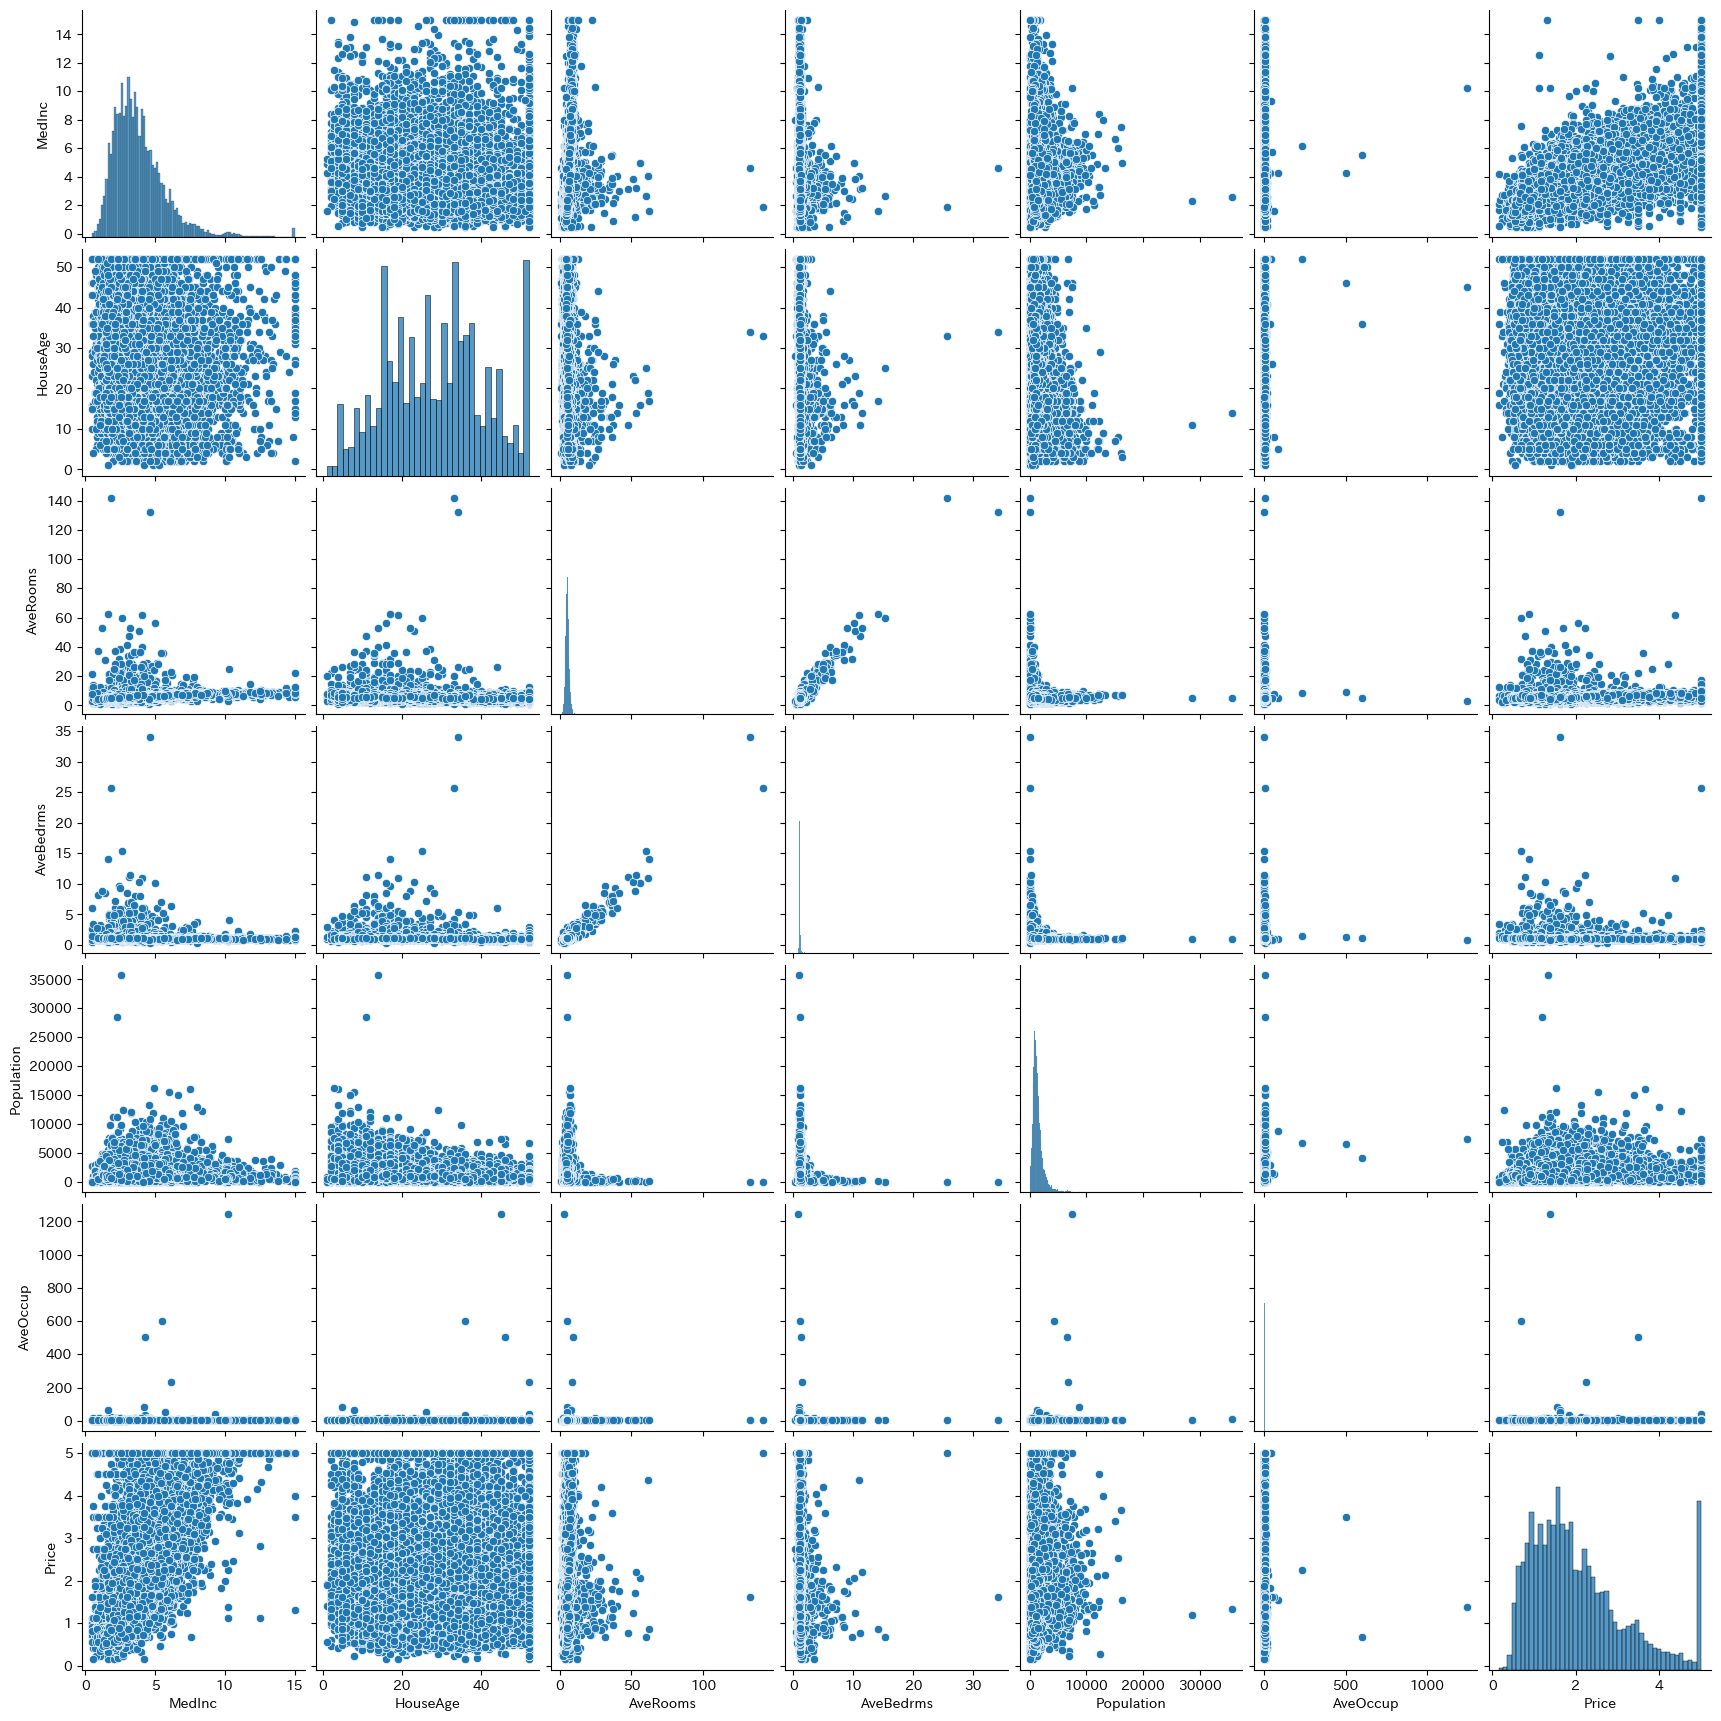

In [13]:
import seaborn as sns
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

df_housing = pd.DataFrame(housing.data,  columns = housing.feature_names)
#print(df_housing)
df_housing['Price'] = housing.target
#df_housing.head()

plt.figure(figsize=(20, 15))
sns.pairplot(df_housing.drop(['Latitude', 'Longitude'], axis=1))
#plt.savefig('housing_pair.png')
plt.show()

## 8. その他のデータの不整合を取り除く

その他の不整合の例：
説明変数 x と目的変数 y の関係が写像になっておらず、同一の x に対して複数の y が存在している。


住宅の条件 X からアパートの家賃 y を予測する回帰モデルを作りたい。

当然、同じ建物でも１階と２階では家賃が異なっている。

しかし、予期せぬトラブルが発生し、階数のデータが抜けてしまった。

この結果、同じ条件 X に対応する家賃 y が、複数通り存在することになってしまった。




## 8の対応策

説明変数を列方向に結合し、同じ説明変数に対して、目的変数が複数ないか確認する。

In [14]:
#同じ条件で価格が違うデータを探す

import csv

# 家賃以外をキーにして価格を集合とした辞書を作る。
dic = {}  # 空の辞書を作成
with open('sample08.csv', encoding="utf8") as f:
    reader = csv.reader(f)
    for row in reader:
        #print(row)
        price = row[0]  # 行から価格を取得
        key = "".join(row[1:6])  # 行の2列目から6列目までの値を結合してキーを作成
        #print(key)

        if key in dic:
            dic[key].add(price)  # 既にキーが存在する場合、そのキーに価格を追加
        else:
            dic[key] = set()  # 新しいキーの場合、セットを作成
            dic[key].add(price)  # セットに価格を追加

# これで dic は、キーが key であり、対応する価格がセットとして格納された辞書となる

for key, price in dic.items():
    #print(key, price)
    if len(list(price))>1 :
        print(key, price)

愛媛県松山市南江戸２ＪＲ予讃線/松山駅 歩12分1K22.35m2築15年 {'4.7万円', '4.6万円'}
愛媛県松山市湊町８ＪＲ予讃線/松山駅 歩7分ワンルーム31.37m2築2年 {'6.05万円', '5.95万円'}
愛媛県松山市居相４ＪＲ予讃線/松山駅 バス21分 (バス停)古川横田 歩9分1K23.97m2築20年 {'4.4万円', '2.3万円', '4.5万円'}
愛媛県松山市居相４ＪＲ予讃線/松山駅 バス21分 (バス停)古川横田 歩9分1K26.08m2築20年 {'2.4万円', '4.8万円', '4.7万円'}
愛媛県松山市辻町ＪＲ予讃線/松山駅 歩13分1K19.87m2築14年 {'3.9万円', '3.8万円'}
愛媛県松山市本町６ＪＲ予讃線/松山駅 バス10分 (バス停)本町５丁目 歩3分1K19.87m2築19年 {'3.4万円', '3.7万円', '3.6万円'}
愛媛県松山市三番町８ＪＲ予讃線/松山駅 歩6分1K28.5m2築27年 {'3.7万円', '3.6万円'}
愛媛県松山市小栗７ＪＲ予讃線/松山駅 歩21分1K19.87m2築14年 {'4.3万円', '4.5万円', '3万円', '4.6万円', '2.9万円'}
愛媛県松山市南江戸２伊予鉄道環状線/ＪＲ松山駅前駅 歩12分2LDK56.3m2築24年 {'6.7万円', '6.9万円'}
愛媛県松山市南江戸２伊予鉄道環状線/ＪＲ松山駅前駅 歩13分2LDK56.3m2築24年 {'7.3万円', '7.05万円'}
愛媛県松山市南江戸２ＪＲ予讃線/松山駅 歩14分2DK34.65m2築41年 {'3.5万円', '3.8万円'}
愛媛県松山市南江戸２ＪＲ予讃線/松山駅 歩14分2K34.65m2築41年 {'3.5万円', '3.8万円'}
愛媛県松山市竹原３伊予鉄道郡中線/土橋駅 歩11分1LDK32.92m2築3年 {'5.3万円', '5.95万円', '5.85万円', '5.8万円', '5.7万円', '5.45万円'}
愛媛県松山市竹原３伊予鉄道郡中線/土橋駅 歩11分2LDK65.84m2築3年 {'7.6万円', '7.8万円'}
愛媛県松山市辻町伊予鉄道環状線/宮田町駅 歩9分1LDK35m2築6年 {'5.75万円', '5.5